# Makeover Monday, 9 April 2018

Analysis and visualisation of Arctic sea ice extent for [Makeover Monday](http://www.makeovermonday.co.uk).

Data from [US National Snow & Ice data centre](https://nsidc.org/) via [Makeover Monday](http://www.makeovermonday.co.uk/data/).

In [2]:
import collections
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats

# Read the dataset
Rename the columns while we're here.

In [4]:
malaria_raw = pd.read_excel('Simulated VisualizeNoMalaria Counts.xlsx').drop('Disclaimer', axis=1)
malaria_raw.columns = ['country', 'province', 'district', 'ruralurban', 'date', 'report', 'cases']
malaria_raw.head()

,country,province,district,ruralurban,date,report,cases
0,Zambia,Southern,Chikankata,Rural,2014-01-01,Health Facility,0
1,Zambia,Southern,Chikankata,Rural,2014-01-01,Community Health Worker,288
2,Zambia,Southern,Chikankata,Rural,2014-02-01,Health Facility,0
3,Zambia,Southern,Chikankata,Rural,2014-02-01,Community Health Worker,251
4,Zambia,Southern,Chikankata,Rural,2014-03-01,Health Facility,0


# Explore the data
Just see how many items there are for each category

In [6]:
malaria_raw.country.value_counts()

Zambia    3586
Name: country, dtype: int64

In [7]:
malaria_raw.province.value_counts()

Southern    3586
Name: province, dtype: int64

In [8]:
malaria_raw.district.value_counts()

Monze          400
Choma          400
Kalomo         400
Mazabuka       400
Kazungula      400
Chikankata     200
Pemba          200
Sinazongwe     200
Zimba          200
Namwala        200
Gwembe         200
Siavonga       200
Livingstone    186
Name: district, dtype: int64

In [9]:
malaria_raw.ruralurban.value_counts()

Rural    2404
Urban    1182
Name: ruralurban, dtype: int64

In [13]:
malaria_raw.report.value_counts()

Health Facility            1793
Community Health Worker    1793
Name: report, dtype: int64

Country and province don't mean anything.

In [12]:
malaria_raw.groupby(['district', 'ruralurban']).size()

district     ruralurban
Chikankata   Rural         200
Choma        Rural         200
             Urban         200
Gwembe       Rural         200
Kalomo       Rural         200
             Urban         200
Kazungula    Rural         200
             Urban         200
Livingstone  Rural           4
             Urban         182
Mazabuka     Rural         200
             Urban         200
Monze        Rural         200
             Urban         200
Namwala      Rural         200
Pemba        Rural         200
Siavonga     Rural         200
Sinazongwe   Rural         200
Zimba        Rural         200
dtype: int64

# Initial plots
Just a quick few plots to see what the data looks like.

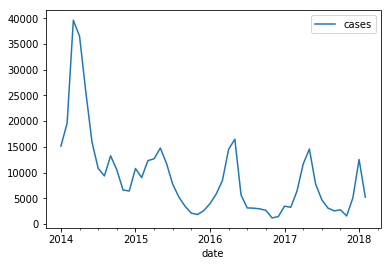

In [15]:
malaria_raw.groupby('date').sum().plot()

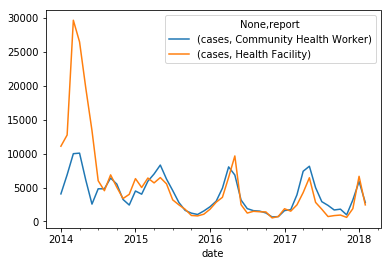

In [23]:
malaria_raw.groupby(['date', 'report']).sum().unstack().plot()

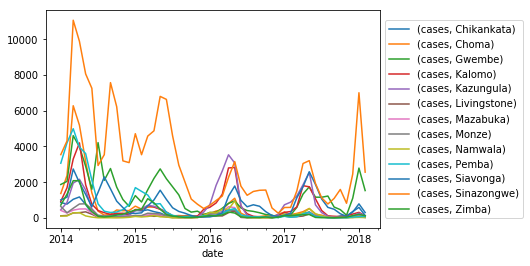

In [25]:
ax = malaria_raw.groupby(['date', 'district']).sum().unstack().plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [64]:
malaria_raw.groupby('district').sum().sort_values(by='cases')

,cases
district,
Livingstone,4790
Namwala,6439
Mazabuka,8068
Monze,9243
Chikankata,13917
Zimba,14984
Choma,32397
Kazungula,33731
Pemba,35081


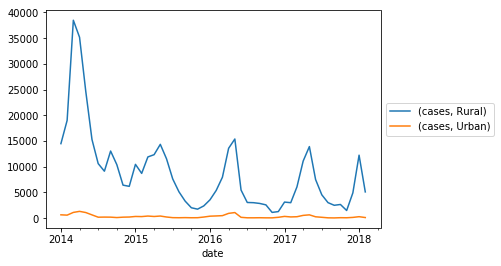

In [26]:
ax = malaria_raw.groupby(['date', 'ruralurban']).sum().unstack().plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

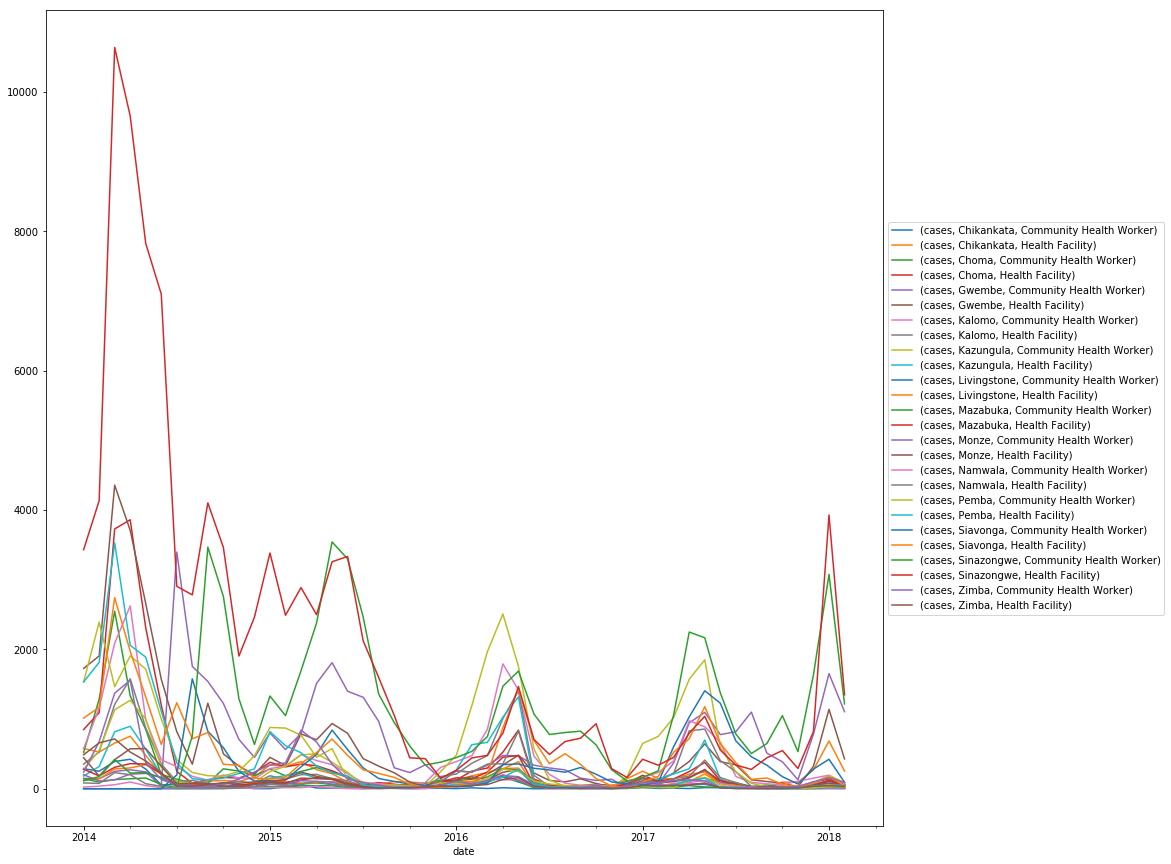

In [34]:
ax = malaria_raw.groupby(['date', 'district', 'report']).sum().unstack([-2, -1]).plot(figsize=(15, 15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# Just 2014
Atypical things are happening in 2014. Let's look at just this data.

In [43]:
malaria_2014 = malaria_raw[malaria_raw.date.dt.year == 2014]
malaria_2014.head()

,country,province,district,ruralurban,date,report,cases
0,Zambia,Southern,Chikankata,Rural,2014-01-01,Health Facility,0
1,Zambia,Southern,Chikankata,Rural,2014-01-01,Community Health Worker,288
2,Zambia,Southern,Chikankata,Rural,2014-02-01,Health Facility,0
3,Zambia,Southern,Chikankata,Rural,2014-02-01,Community Health Worker,251
4,Zambia,Southern,Chikankata,Rural,2014-03-01,Health Facility,0


In [71]:
malaria_2015p = malaria_raw[malaria_raw.date.dt.year >= 2015]
malaria_2015p.head()

,country,province,district,ruralurban,date,report,cases
24,Zambia,Southern,Chikankata,Rural,2015-01-01,Health Facility,0
25,Zambia,Southern,Chikankata,Rural,2015-01-01,Community Health Worker,87
26,Zambia,Southern,Chikankata,Rural,2015-02-01,Health Facility,0
27,Zambia,Southern,Chikankata,Rural,2015-02-01,Community Health Worker,77
28,Zambia,Southern,Chikankata,Rural,2015-03-01,Health Facility,0


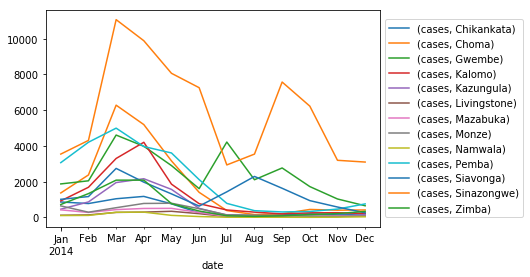

In [75]:
ax = malaria_2014.groupby(['date', 'district']).sum().unstack().plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

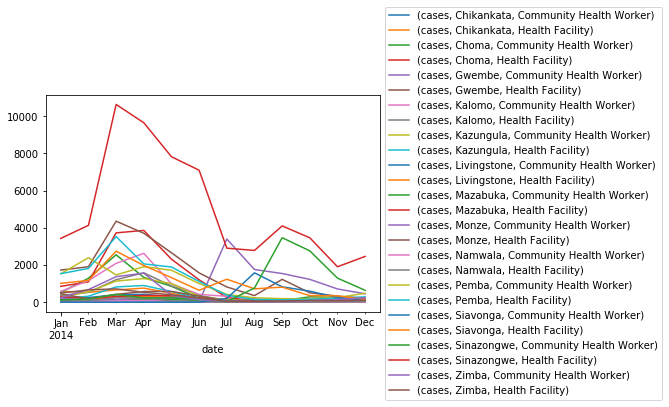

In [74]:
ax = malaria_2014.groupby(['date', 'district', 'report']).sum().unstack([-2, -1]).plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

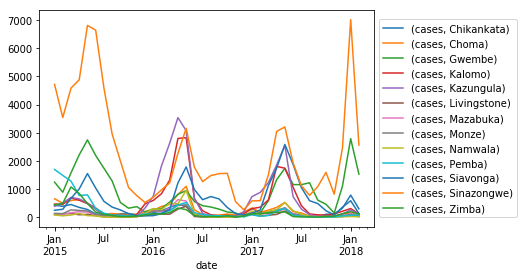

In [76]:
ax = malaria_2015p.groupby(['date', 'district']).sum().unstack().plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

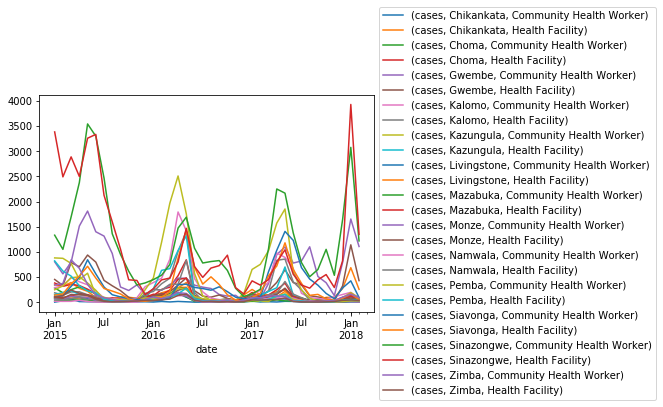

In [73]:
ax = malaria_2015p.groupby(['date', 'district', 'report']).sum().unstack([-2, -1]).plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# Sinazongwe
Sinazongwe is an outlier. Let's look at just that, and everything except Sinazongwe.

In [65]:
malaria_sina = malaria_raw[malaria_raw.district == 'Sinazongwe']
malaria_sina.head()

,country,province,district,ruralurban,date,report,cases
3186,Zambia,Southern,Sinazongwe,Rural,2014-01-01,Health Facility,0
3187,Zambia,Southern,Sinazongwe,Rural,2014-01-01,Community Health Worker,3
3188,Zambia,Southern,Sinazongwe,Rural,2014-02-01,Health Facility,0
3189,Zambia,Southern,Sinazongwe,Rural,2014-02-01,Community Health Worker,0
3190,Zambia,Southern,Sinazongwe,Rural,2014-03-01,Health Facility,0


In [66]:
malaria_not_sina = malaria_raw[malaria_raw.district != 'Sinazongwe']
malaria_not_sina.head()

,country,province,district,ruralurban,date,report,cases
0,Zambia,Southern,Chikankata,Rural,2014-01-01,Health Facility,0
1,Zambia,Southern,Chikankata,Rural,2014-01-01,Community Health Worker,288
2,Zambia,Southern,Chikankata,Rural,2014-02-01,Health Facility,0
3,Zambia,Southern,Chikankata,Rural,2014-02-01,Community Health Worker,251
4,Zambia,Southern,Chikankata,Rural,2014-03-01,Health Facility,0


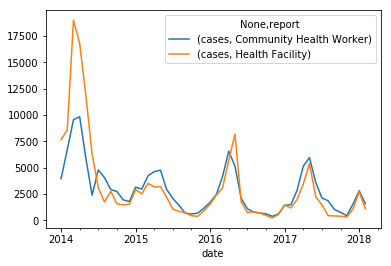

In [67]:
malaria_not_sina.groupby(['date', 'report']).sum().unstack().plot()

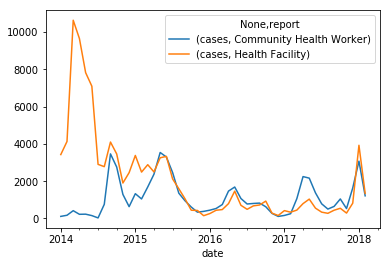

In [68]:
malaria_sina.groupby(['date', 'report']).sum().unstack().plot()

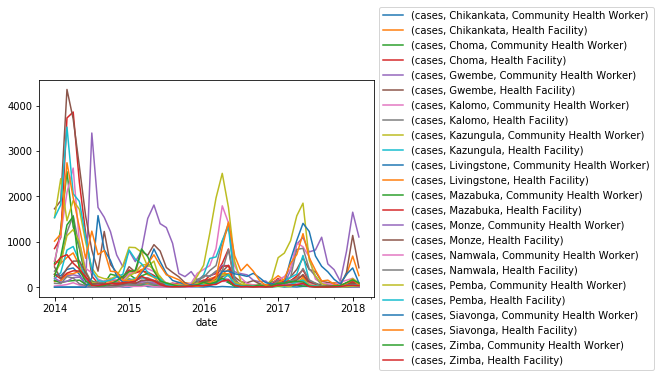

In [77]:
ax = malaria_not_sina.groupby(['date', 'district', 'report']).sum().unstack([-2, -1]).plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# Summarising districts

In [155]:
district_month = malaria_raw.groupby(['date', 'district']).sum().unstack().T.reset_index().set_index('district').drop('level_0', axis=1).T
district_month.head()

district,Chikankata,Choma,Gwembe,Kalomo,Kazungula,Livingstone,Mazabuka,Monze,Namwala,Pemba,Siavonga,Sinazongwe,Zimba
date,,,,,,,,,,,,,
2014-01-01 00:00:00,865,1370,1875,927,462,123,425,646,107,3064,1014,3543,725
2014-02-01 00:00:00,778,2377,2049,1688,869,142,280,294,114,4205,1168,4308,1333
2014-03-01 00:00:00,1046,6277,4606,3298,1951,283,439,545,289,4993,2742,11058,2086
2014-04-01 00:00:00,1177,5192,3980,4202,2165,299,503,783,298,3965,1974,9880,2086
2014-05-01 00:00:00,761,3161,2900,1862,1569,345,509,795,117,3605,1318,8058,773


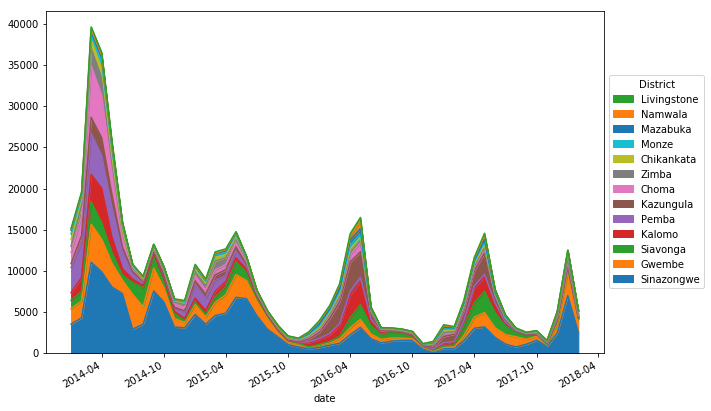

In [156]:
district_month_sorted = district_month.reindex(district_month.sum().sort_values(ascending=False).index, axis=1)
ax = district_month_sorted.plot.area(figsize=(10, 7))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), title='District');

## Focusing on the largest districts
Can we simplify this by focusing on just the largest districts?

In [186]:
d2_month = pd.DataFrame()
d2_month['Sinazongwe'] = district_month['Sinazongwe']
d2_month['Gwembe'] = district_month['Gwembe']
d2_month['Siavonga'] = district_month['Siavonga']
d2_month['Others'] = district_month_sorted.drop(['Sinazongwe', 'Gwembe', 'Siavonga'], axis=1).sum(axis=1)
d2_month.head()

,Sinazongwe,Gwembe,Siavonga,Others
date,,,,
2014-01-01,3543,1875,1014,8714
2014-02-01,4308,2049,1168,12080
2014-03-01,11058,4606,2742,21207
2014-04-01,9880,3980,1974,20670
2014-05-01,8058,2900,1318,13497


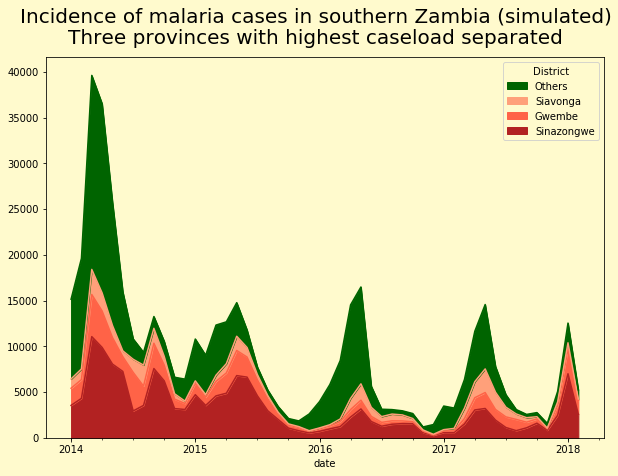

In [187]:
f, ax = plt.subplots(1, 1, sharey=True, figsize=(10, 7), facecolor='lemonchiffon')
plt.suptitle('Incidence of malaria cases in southern Zambia (simulated)\nThree provinces with highest caseload separated', fontsize=20)
d2_month.plot.area(figsize=(10, 7), ax=ax, color=['firebrick', 'tomato', 'lightsalmon', 'darkgreen']) 
ax.set_facecolor('lemonchiffon')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='District', facecolor='lemonchiffon'); # , loc='center left', bbox_to_anchor=(1, 0.5)

In [189]:
f.savefig('malaria-districts.png', facecolor=f.get_facecolor(), transparent=True)

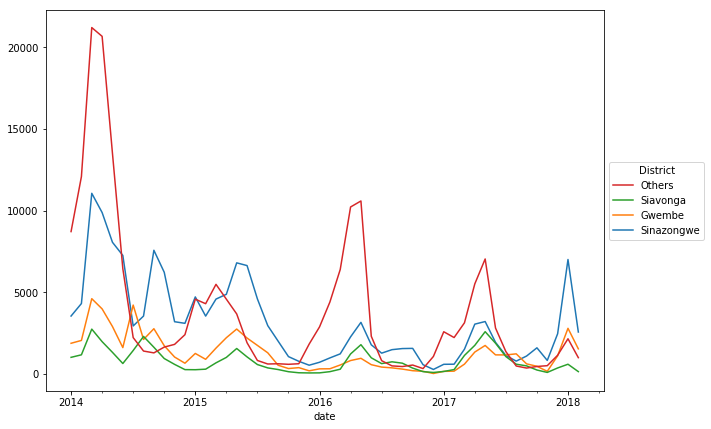

In [188]:
ax = d2_month.plot(figsize=(10, 7))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), title='District');

# Annual changes

In [122]:
district_year = malaria_raw.groupby([malaria_raw.date.dt.year, 'district']).sum().unstack().T.reset_index().set_index('district').drop('level_0', axis=1).T
district_year

district,Chikankata,Choma,Gwembe,Kalomo,Kazungula,Livingstone,Mazabuka,Monze,Namwala,Pemba,Siavonga,Sinazongwe,Zimba
date,,,,,,,,,,,,,
2014,5852,21810,29523,14410,8093,1752,2919,4152,1073,24984,15995,70664,8326
2015,2717,4030,15349,4005,3623,837,1297,1539,695,6925,6295,43057,3930
2016,2178,3940,4963,9690,13009,1255,2328,1939,2801,2019,7087,16823,1306
2017,2073,2396,9899,6983,8627,845,1322,1452,1813,994,10595,18761,1094
2018,1097,221,4325,441,379,101,202,161,57,159,731,9569,328


In [83]:
# district_year = malaria_raw.groupby([malaria_raw.date.dt.year, 'district']).sum().unstack()
# district_year

cases                                                            \
district Chikankata  Choma Gwembe Kalomo Kazungula Livingstone Mazabuka Monze   
date                                                                            
2014           5852  21810  29523  14410      8093        1752     2919  4152   
2015           2717   4030  15349   4005      3623         837     1297  1539   
2016           2178   3940   4963   9690     13009        1255     2328  1939   
2017           2073   2396   9899   6983      8627         845     1322  1452   
2018           1097    221   4325    441       379         101      202   161   

                                                   
district Namwala  Pemba Siavonga Sinazongwe Zimba  
date                                               
2014        1073  24984    15995      70664  8326  
2015         695   6925     6295      43057  3930  
2016        2801   2019     7087      16823  1306  
2017        1813    994    10595      18761  1094  
2018          57    159      731       9569   328

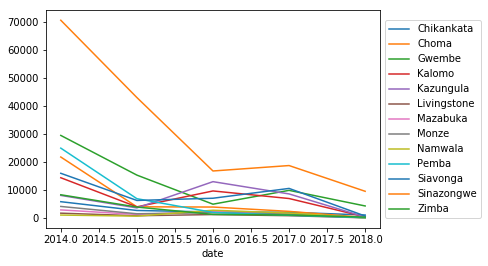

In [123]:
ax = district_year.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

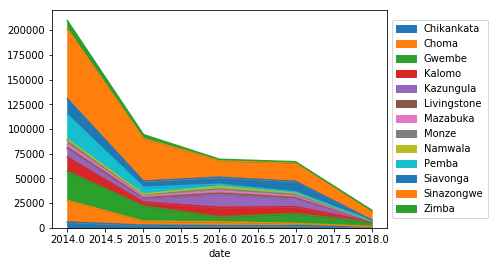

In [139]:
ax = district_year.plot.area()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

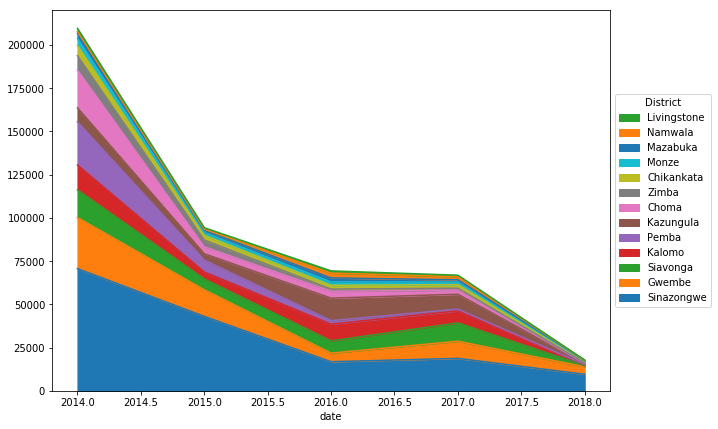

In [151]:
district_year_sorted = district_year.reindex(district_year.sum().sort_values(ascending=False).index, axis=1)
ax = district_year_sorted.plot.area(figsize=(10, 7))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), title='District');

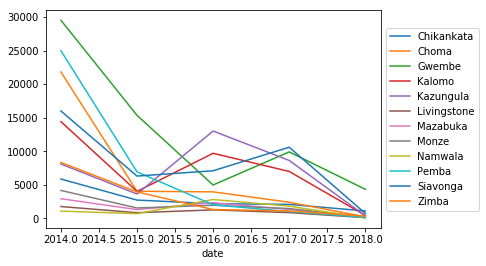

In [126]:
ax = district_year.drop('Sinazongwe', axis=1).plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Focusing on the largest districts
Again, can we simplify this by focusing on just the largest districts?

In [165]:
d2_year = pd.DataFrame()
d2_year['others'] = district_year.drop(['Sinazongwe', 'Gwembe', 'Siavonga'], axis=1).sum(axis=1)
d2_year['siavonga'] = district_year['Siavonga']
d2_year['gwembe'] = district_year['Gwembe']
d2_year['sinazongwe'] = district_year['Sinazongwe']
d2_year

,others,siavonga,gwembe,sinazongwe
date,,,,
2014,93371,15995,29523,70664
2015,29598,6295,15349,43057
2016,40465,7087,4963,16823
2017,27599,10595,9899,18761
2018,3146,731,4325,9569


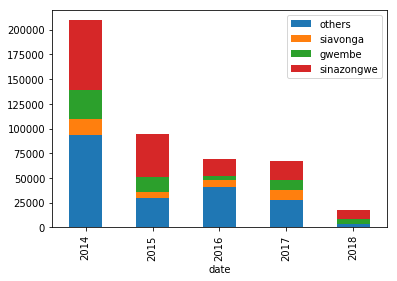

In [166]:
d2_year.plot.bar(stacked=True)

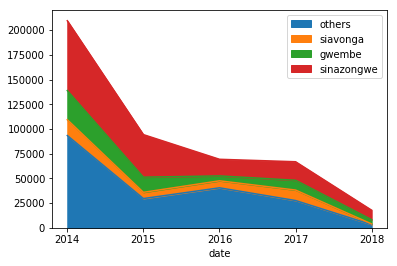

In [167]:
d2_year.plot.area(xticks=[x for x in range(2014, 2019)])